Selected font: Noto Sans CJK JP
Generating plot for exponential...


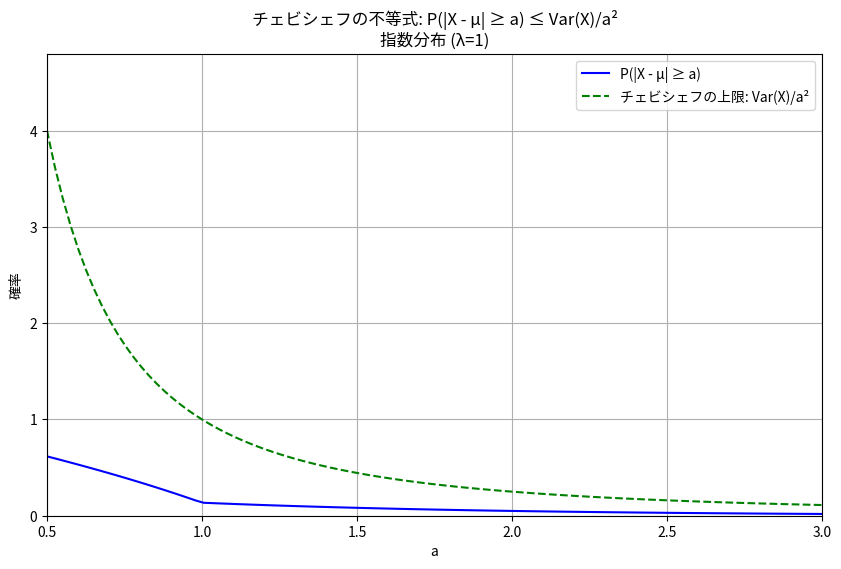

Plot saved as 'chebyshev_exponential.png'
Generating plot for gamma...


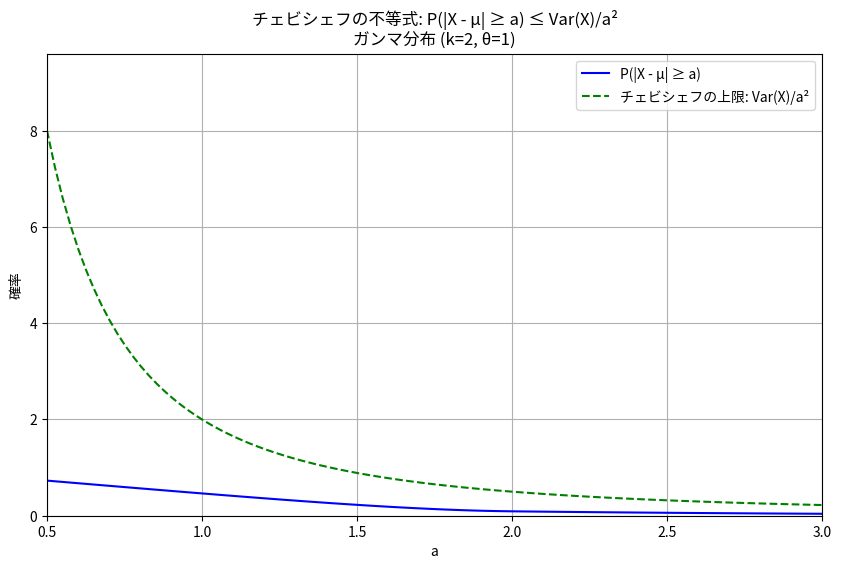

Plot saved as 'chebyshev_gamma.png'
Generating plot for lognorm...


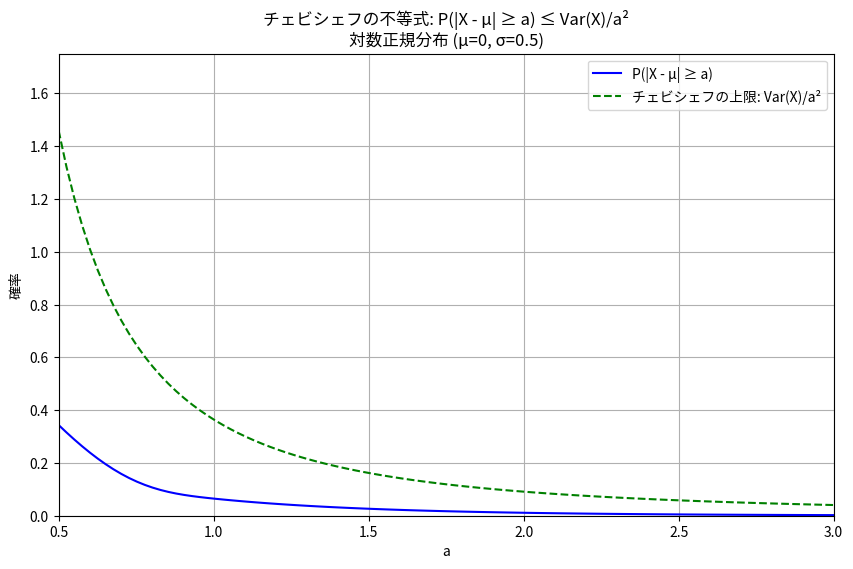

Plot saved as 'chebyshev_lognorm.png'
Generating plot for beta...


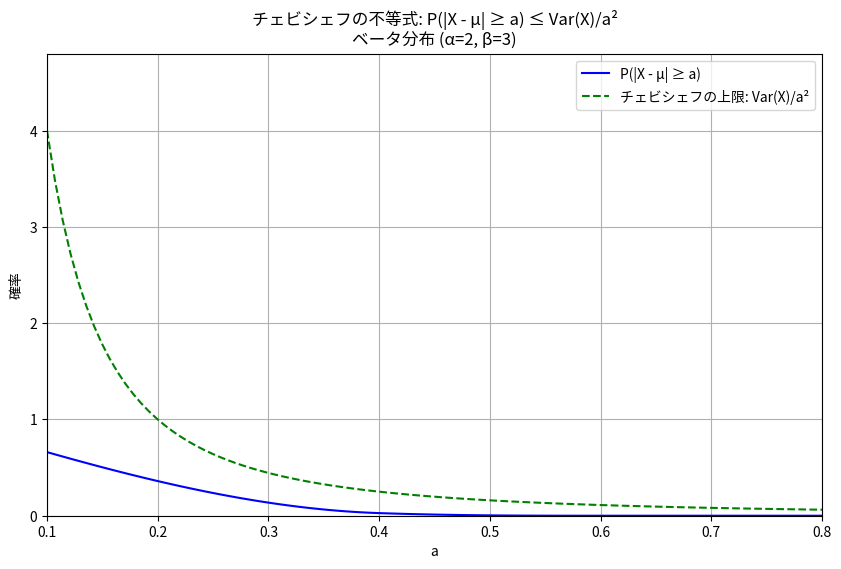

Plot saved as 'chebyshev_beta.png'
Generating plot for chi2...


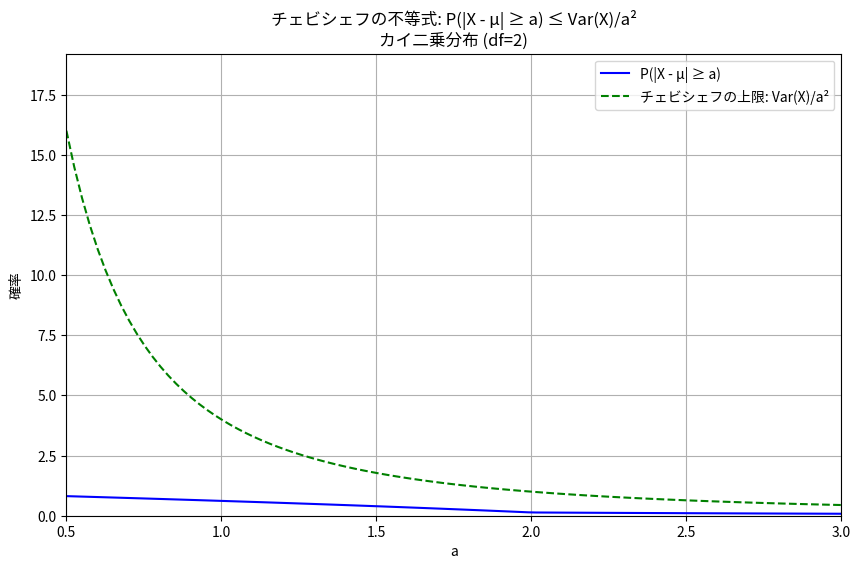

Plot saved as 'chebyshev_chi2.png'
Generating plot for rayleigh...


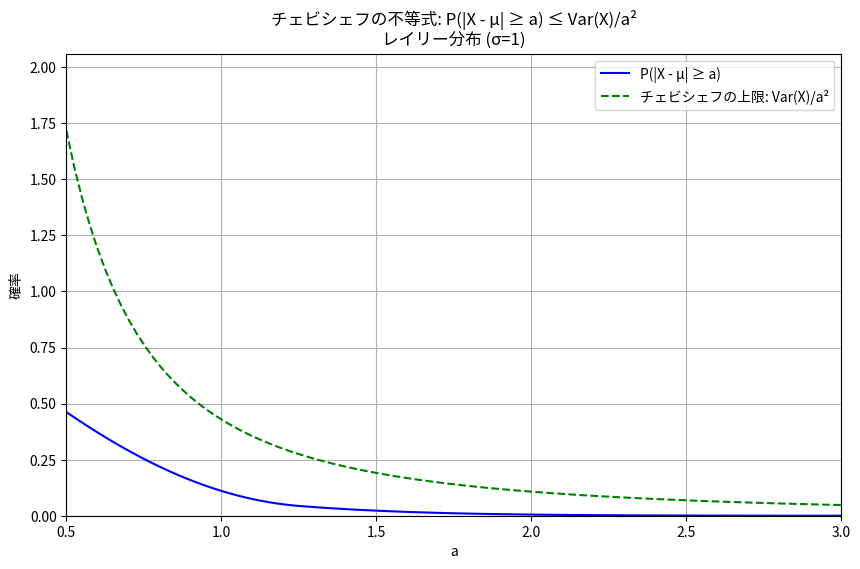

Plot saved as 'chebyshev_rayleigh.png'
Generating plot for pareto...


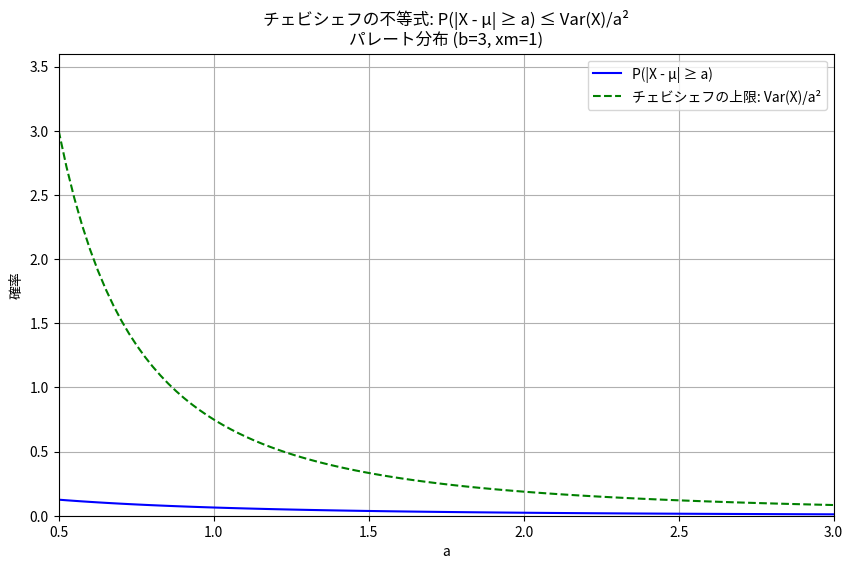

Plot saved as 'chebyshev_pareto.png'
Generating plot for f...


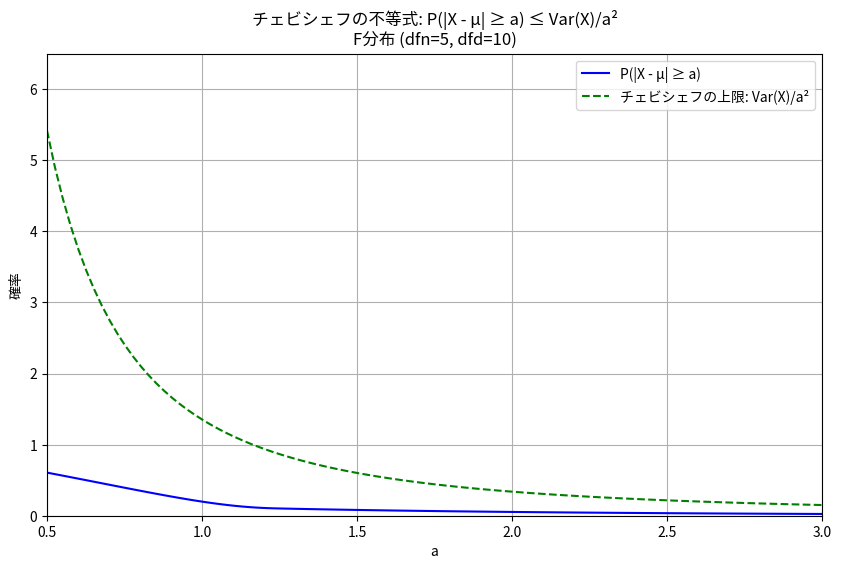

Plot saved as 'chebyshev_f.png'
Generating plot for half_normal...


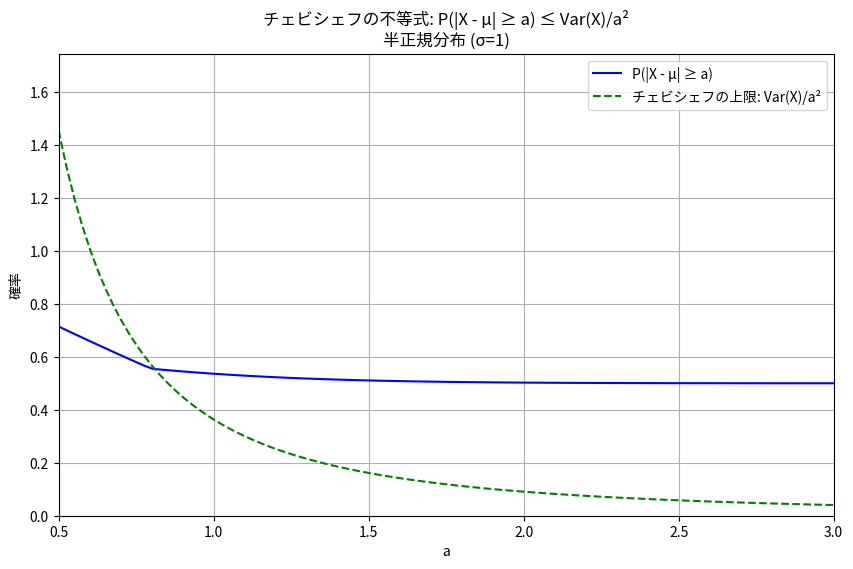

Plot saved as 'chebyshev_half_normal.png'


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from scipy.stats import expon, gamma, lognorm, weibull_min, beta, chi2, rayleigh, pareto, f, norm
import platform
import warnings

# Matplotlibのフォント警告を抑制
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# システムに応じたフォントを選択
def get_available_font():
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    system = platform.system()
    if system == "Windows":
        for font in ['MS Gothic', 'Yu Gothic', 'Meiryo']:
            if font in available_fonts:
                return font
    elif system == "Darwin":  # Mac
        for font in ['Hiragino Sans', 'AppleGothic', 'Noto Sans CJK JP']:
            if font in available_fonts:
                return font
    elif system == "Linux":
        for font in ['Noto Sans CJK JP', 'DejaVu Sans']:
            if font in available_fonts:
                return font
    return 'DejaVu Sans'

# フォントを設定
selected_font = get_available_font()
plt.rcParams['font.family'] = selected_font
print(f"Selected font: {selected_font}")

# 分布のリスト（名前、パラメータ、期待値、分散、a範囲）
distributions = [
    {
        'name': 'exponential',
        'params': {'scale': 1},  # E[X] = scale = 1, Var(X) = scale^2 = 1
        'mu': 1,
        'var': 1,
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: expon.cdf(x, scale=params['scale']),
        'dist_label': '指数分布 (λ=1)'
    },
    {
        'name': 'gamma',
        'params': {'k': 2, 'theta': 1},  # E[X] = k*theta = 2, Var(X) = k*theta^2 = 2
        'mu': 2,
        'var': 2,
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: gamma.cdf(x, a=params['k'], scale=params['theta']),
        'dist_label': 'ガンマ分布 (k=2, θ=1)'
    },
    {
        'name': 'lognorm',
        'params': {'mu': 0, 'sigma': 0.5},  # E[X] = exp(mu + sigma^2/2) ≈ 1.284, Var(X) = [exp(sigma^2) - 1]*exp(2*mu + sigma^2) ≈ 0.368
        'mu': np.exp(0 + 0.5**2 / 2),
        'var': (np.exp(0.5**2) - 1) * np.exp(2 * 0 + 0.5**2),
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: lognorm.cdf(x, s=params['sigma'], scale=np.exp(params['mu'])),
        'dist_label': '対数正規分布 (μ=0, σ=0.5)'
    },
    # {
    #     'name': 'weibull',
    #     'params': {'c': 2, 'scale': 1.128},  # E[X] = scale * Γ(1 + 1/c) ≈ 1, Var(X) = scale^2 * [Γ(1 + 2/c) - Γ(1 + 1/c)^2] ≈ 0.214
    #     'mu': 1.128 * gamma(1 + 1/2),
    #     'var': 1.128**2 * (gamma(1 + 2/2) - gamma(1 + 1/2)**2),
    #     'a_range': (0.5, 3),
    #     'cdf_func': lambda x, params: weibhull_min.cdf(x, c=params['c'], scale=params['scale']),
    #     'dist_label': 'ワイブル分布 (c=2, scale=1.128)'
    # },
    {
        'name': 'beta',
        'params': {'a': 2, 'b': 3},  # E[X] = a/(a+b) = 0.4, Var(X) = ab/[(a+b)^2 * (a+b+1)] ≈ 0.024
        'mu': 2 / (2 + 3),
        'var': (2 * 3) / ((2 + 3)**2 * (2 + 3 + 1)),
        'a_range': (0.1, 0.8),  # ベータは[0,1]に限定
        'cdf_func': lambda x, params: beta.cdf(x, a=params['a'], b=params['b']),
        'dist_label': 'ベータ分布 (α=2, β=3)'
    },
    {
        'name': 'chi2',
        'params': {'df': 2},  # E[X] = df = 2, Var(X) = 2*df = 4
        'mu': 2,
        'var': 4,
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: chi2.cdf(x, df=params['df']),
        'dist_label': 'カイ二乗分布 (df=2)'
    },
    {
        'name': 'rayleigh',
        'params': {'scale': 1},  # E[X] = scale * sqrt(π/2) ≈ 1.253, Var(X) = scale^2 * (4 - π)/2 ≈ 0.429
        'mu': 1 * np.sqrt(np.pi / 2),
        'var': 1**2 * (4 - np.pi) / 2,
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: rayleigh.cdf(x, scale=params['scale']),
        'dist_label': 'レイリー分布 (σ=1)'
    },
    {
        'name': 'pareto',
        'params': {'b': 3, 'scale': 1},  # E[X] = scale * b / (b-1) = 1.5, Var(X) = scale^2 * b / [(b-1)^2 * (b-2)] ≈ 0.75
        'mu': 1 * 3 / (3 - 1),
        'var': 1**2 * 3 / ((3 - 1)**2 * (3 - 2)),
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: pareto.cdf(x, b=params['b'], scale=params['scale']),
        'dist_label': 'パレート分布 (b=3, xm=1)'
    },
    {
        'name': 'f',
        'params': {'dfn': 5, 'dfd': 10},  # E[X] = dfd / (dfd-2) ≈ 1.25, Var(X) = 2*dfd^2*(dfn+dfd-2) / [dfn*(dfd-2)^2*(dfd-4)] ≈ 0.781
        'mu': 10 / (10 - 2),
        'var': 2 * 10**2 * (5 + 10 - 2) / (5 * (10 - 2)**2 * (10 - 4)),
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: f.cdf(x, dfn=params['dfn'], dfd=params['dfd']),
        'dist_label': 'F分布 (dfn=5, dfd=10)'
    },
    {
        'name': 'half_normal',
        'params': {'scale': 1},  # E[X] = scale * sqrt(2/π) ≈ 0.798, Var(X) = scale^2 * (1 - 2/π) ≈ 0.363
        'mu': 1 * np.sqrt(2 / np.pi),
        'var': 1**2 * (1 - 2 / np.pi),
        'a_range': (0.5, 3),
        'cdf_func': lambda x, params: norm.cdf(x, loc=0, scale=params['scale']) - norm.cdf(0, loc=0, scale=params['scale']) if x >= 0 else 0,
        'dist_label': '半正規分布 (σ=1)'
    }
]

# 各分布でグラフを生成
for dist in distributions:
    print(f"Generating plot for {dist['name']}...")

    # 分布のパラメータ
    params = dist['params']
    mu = dist['mu']
    var = dist['var']
    a_min, a_max = dist['a_range']
    a_values = np.linspace(a_min, a_max, 100)  # aの値
    
    # P(|X - μ| ≥ a) = P(X ≤ μ - a) + P(X ≥ μ + a)
    p_abs_x_minus_mu_geq_a = []
    for a in a_values:
        p_leq_mu_minus_a = dist['cdf_func'](mu - a, params) if mu - a >= 0 else 0  # 非負分布では通常0
        p_geq_mu_plus_a = 1 - dist['cdf_func'](mu + a, params)
        p_abs_x_minus_mu_geq_a.append(p_leq_mu_minus_a + p_geq_mu_plus_a)

    # グラフの設定
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(a_values, p_abs_x_minus_mu_geq_a, label='P(|X - μ| ≥ a)', color='blue')
    chebyshev_bound = var / (a_values**2)
    ax.plot(a_values, chebyshev_bound, label='チェビシェフの上限: Var(X)/a²', color='green', linestyle='--')
    
    ax.grid(True)
    ax.set_xlabel('a')
    ax.set_ylabel('確率')
    ax.set_title(f'チェビシェフの不等式: P(|X - μ| ≥ a) ≤ Var(X)/a²\n{dist["dist_label"]}')
    ax.set_ylim(0, max(max(p_abs_x_minus_mu_geq_a), max(chebyshev_bound)) * 1.2)
    ax.set_xlim(a_min, a_max)
    ax.legend()

    # PNGとして保存
    png_filename = f'chebyshev_{dist["name"]}.png'
    plt.savefig(png_filename, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close(fig)

    print(f"Plot saved as '{png_filename}'")